In [1]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [2]:
#imports


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from parse_csv_files import parse_tiktok_comments

# Tiktok sentiment mean plots

In [3]:
#data imports 
filename = "../data/TikTok-with-sentiments_24-11-2024_15h12.csv"
tiktok = parse_tiktok_comments(filename)
tiktok.head()



,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,difference,publisher,post_likes,post_shares,post_description,date_scraped,join_key,positive,neutral,negative
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,0,0.62,0.17,0.22
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21.7K,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,1,0.56,0.17,0.27
2,2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16.5K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,2,0.44,0.16,0.40
3,3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13.2K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,3,0.98,0.01,0.02
4,4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,4,0.16,0.40,0.43


In [6]:
# contains 
tiktok['contains_brat'] = tiktok['Comment Text'].str.contains('brat', case = False, regex=True)
tiktok['contains_kamala'] = tiktok['Comment Text'].str.contains('kamala', case = False, regex=True)
tiktok['contains_trump'] = tiktok['Comment Text'].str.contains('trump', case = False, regex=True)
tiktok['contains_politics'] = tiktok['Comment Text'].str.contains('politic', case = False, regex=True)
tiktok['contains_democrat']= tiktok['Comment Text'].str.contains('democrat', case = False, regex=True)
tiktok['contains_republican'] = tiktok['Comment Text'].str.contains('republican', case = False, regex=True)

# politics
tiktok['contains_registration'] = tiktok['Comment Text'].str.contains('registration', case = False, regex=True)
tiktok['contains_vote'] = tiktok['Comment Text'].str.contains('vote', case = False, regex=True)
tiktok['contains_election'] = tiktok['Comment Text'].str.contains('election', case = False, regex=True)
tiktok['contains_donation'] = tiktok['Comment Text'].str.contains('donation', case = False, regex=True)
tiktok['contains_pres'] = tiktok['Comment Text'].str.contains('president', case = False, regex=True)


#Israel / Palestine 
tiktok['contains_isr'] = tiktok['Comment Text'].str.contains('Israel', case = False, regex=True)
tiktok['contains_pal'] = tiktok['Comment Text'].str.contains('Palestine', case = False, regex=True)
tiktok['contains_gaza'] = tiktok['Comment Text'].str.contains('Gaza', case = False, regex=True)


In [5]:
videos_list = tiktok['post_url'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Post " + chr(ord('A')+i)
tiktok['post_name'] = tiktok['post_url'].replace(renaming_posts)
#end exporting the correspondance to csv file between post and urls (for simplification of read)
renaming_table = pd.DataFrame(list(renaming_posts.items()), columns=['post_url', 'post_name'])

(0.0, 1.0)

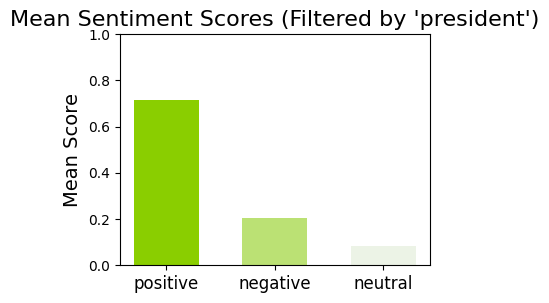

In [13]:
tiktok_cont_pres = tiktok[tiktok['contains_pres']==True]
mean_scores = tiktok_cont_pres[["positive", "negative", "neutral"]].mean()
base_color = "#8ACE00"
palette = sns.light_palette(base_color, n_colors=3, reverse=True)

# Plot the means
plt.figure(figsize=(4, 3))
plt.bar(mean_scores.index, mean_scores, color=palette, width=0.6)
plt.title("Mean Sentiment Scores (Filtered by 'president')", fontsize=16)
plt.ylabel("Mean Score", fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(0, 1)

(0.0, 1.0)

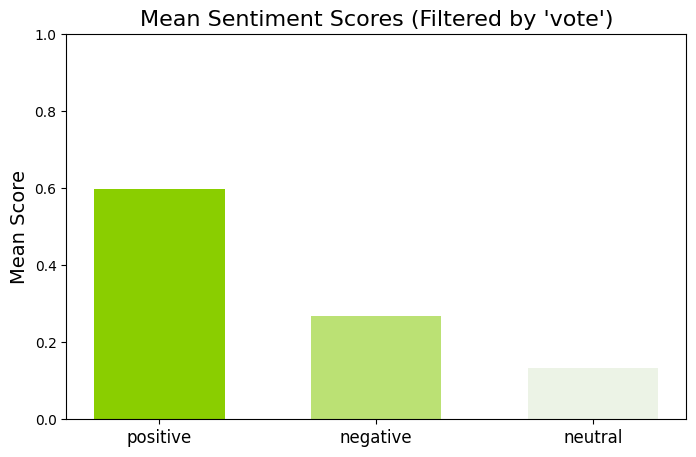

In [12]:
tiktok_cont_vote = tiktok[tiktok['contains_vote']==True]
mean_scores_vote = tiktok_cont_vote[["positive", "negative", "neutral"]].mean()

# Plot the means
plt.figure(figsize=(8, 5))
plt.bar(mean_scores_vote.index, mean_scores_vote, color=palette, width=0.6)
plt.title("Mean Sentiment Scores (Filtered by 'vote')", fontsize=16)
plt.ylabel("Mean Score", fontsize=14)
plt.xticks(fontsize=12)
plt.ylim(0, 1)

(0.0, 1.0)

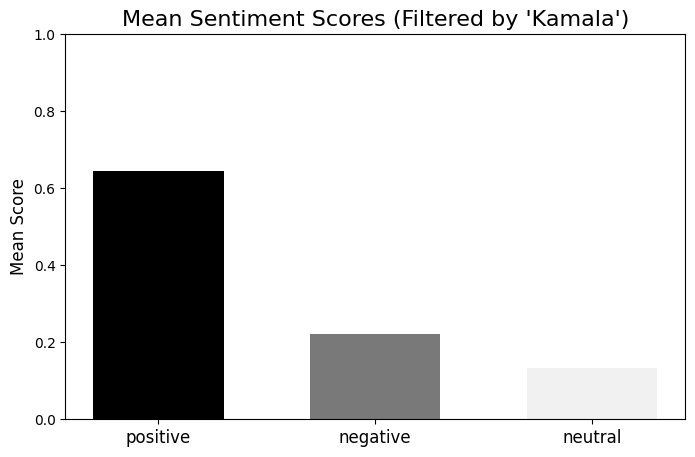

In [19]:
tiktok_cont_kam =tiktok[tiktok['contains_kamala']==True]
mean_scores_kam = tiktok_cont_kam[["positive", "negative", "neutral"]].mean()
palette_black =  sns.light_palette("black", n_colors=3, reverse=True)
# Plot the means
plt.figure(figsize=(8, 5))
plt.bar(mean_scores_kam.index, mean_scores_kam, color=palette_black, width=0.6)
plt.title("Mean Sentiment Scores (Filtered by 'Kamala')", fontsize=16)
plt.ylabel("Mean Score", fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)

# YouTube sentiment mean plots

In [20]:
#YOUTUBE 
filename = "../data/YouTube-with-sentiments_24-11-2024_15h52.csv"
youtube = pd.read_csv(filename)
youtube.head()

,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0,4,0.94,0.03,0.03


In [21]:
youtube['contains_kamala'] = youtube['Comment'].str.contains('kamala', case = False, regex=True)
youtube['contains_trump'] = youtube['Comment'].str.contains('trump', case = False, regex=True)
youtube['contains_politics'] = youtube['Comment'].str.contains('politic', case = False, regex=True)
youtube['contains_democrat']= youtube['Comment'].str.contains('democrat', case = False, regex=True)
youtube['contains_republican'] = youtube['Comment'].str.contains('republican', case = False, regex=True)

"""
# politics
tiktok['contains_registration'] = tiktok['Comment Text'].str.contains('registration', case = False, regex=True)
tiktok['contains_vote'] = tiktok['Comment Text'].str.contains('vote', case = False, regex=True)
tiktok['contains_election'] = tiktok['Comment Text'].str.contains('election', case = False, regex=True)
tiktok['contains_donation'] = tiktok['Comment Text'].str.contains('donation', case = False, regex=True)
tiktok['contains_pres'] = tiktok['Comment Text'].str.contains('president', case = False, regex=True)


#Israel / Palestine 
tiktok['contains_isr'] = tiktok['Comment Text'].str.contains('Israel', case = False, regex=True)
tiktok['contains_pal'] = tiktok['Comment Text'].str.contains('Palestine', case = False, regex=True)
tiktok['contains_gaza'] = tiktok['Comment Text'].str.contains('Gaza', case = False, regex=True)
"""

"\n# politics\ntiktok['contains_registration'] = tiktok['Comment Text'].str.contains('registration', case = False, regex=True)\ntiktok['contains_vote'] = tiktok['Comment Text'].str.contains('vote', case = False, regex=True)\ntiktok['contains_election'] = tiktok['Comment Text'].str.contains('election', case = False, regex=True)\ntiktok['contains_donation'] = tiktok['Comment Text'].str.contains('donation', case = False, regex=True)\ntiktok['contains_pres'] = tiktok['Comment Text'].str.contains('president', case = False, regex=True)\n\n\n#Israel / Palestine \ntiktok['contains_isr'] = tiktok['Comment Text'].str.contains('Israel', case = False, regex=True)\ntiktok['contains_pal'] = tiktok['Comment Text'].str.contains('Palestine', case = False, regex=True)\ntiktok['contains_gaza'] = tiktok['Comment Text'].str.contains('Gaza', case = False, regex=True)\n"

(0.0, 1.0)

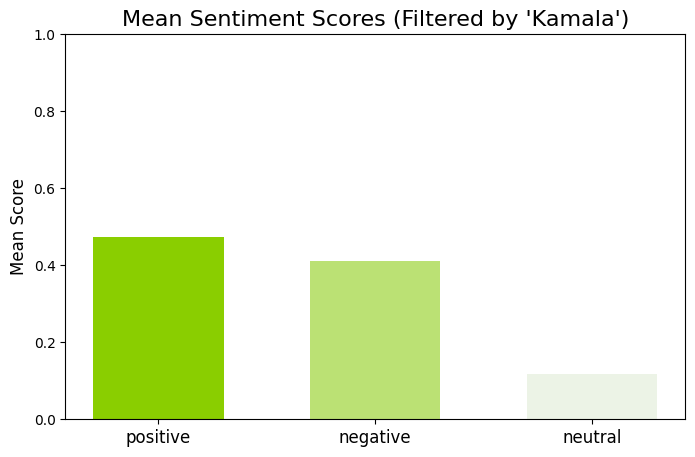

In [22]:
youtube_cont_kam =youtube[youtube['contains_kamala']==True]
mean_scores_kam_yt = youtube_cont_kam[["positive", "negative", "neutral"]].mean()

# Plot the means
plt.figure(figsize=(8, 5))
plt.bar(mean_scores_kam_yt.index, mean_scores_kam_yt, color=palette, width=0.6)
plt.title("Mean Sentiment Scores (Filtered by 'Kamala')", fontsize=16)
plt.ylabel("Mean Score", fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 1)